In [30]:
!pip install sqlalchemy
!pip install ibm_db_sa
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa

In [31]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [32]:
%sql ibm_db_sa://ylg89839:juFr8vgUo7ILSTyg@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB?security=SSL

In [33]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql --persist chicago_socioeconomic_data

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB


ValueError: Table 'chicago_socioeconomic_data' already exists.

In [34]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [35]:
# problem 1: How many rows are in the dataset?
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


1
78


In [36]:
# Problem 2: How many community areas in Chicago have a hardship index greater than 50.0?
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


1
38


In [37]:
# Problem 3: What is the maximum value of hardship index in this dataset?
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


1
98.0


In [38]:
# Problem 4: Which community area which has the highest hardship index?
#We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

#or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.
 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.
 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


community_area_name
Riverdale


In [39]:
# Problem 5: Which Chicago community areas have per-capita incomes greater than $60,000?
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [40]:
# Problem 6: Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn

In [41]:
!pip install matplotlib
!pip install seaborn

 * ibm_db_sa://ylg89839:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


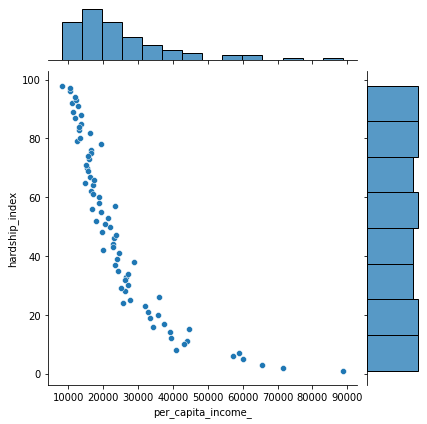

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

